In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

data = pd.read_excel(r"C:\Users\Damilola Ologunagba\Desktop\MLDATA\BCCData.xlsx")
encode = LabelEncoder()
data.System = encode.fit_transform(data.System)
train , test = train_test_split(data,test_size=0.2,random_state=8)

train_x = train.drop(columns=['Surface Segregation energy', 'System'],axis=1)
train_y = train['Surface Segregation energy']
test_x = test.drop(columns=['Surface Segregation energy', 'System'],axis=1)
test_y = test['Surface Segregation energy']

est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0, loss='ls').fit(train_x, train_y)
prediction = est.predict(test_x)
prediction1 = est.predict(train_x)

In [2]:
from sklearn.metrics import r2_score
r2_score(train_y, prediction1)

0.9793723175093642

In [3]:
from sklearn.metrics import r2_score
r2_score(test_y, prediction)

0.8482580844593415

In [4]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, prediction)

0.17597507083224811

In [5]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(train_y, prediction1)

0.0734681606208226

In [6]:
# print result of RMSE for the test set
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(test_y, prediction)))

0.2184115414754952


In [7]:
# print result of RMSE for the train set
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(train_y, prediction1)))

0.09866588286461399


In [8]:
df = pd.DataFrame({'Actual Surface Segregation Energy': train_y, 'Predicted Surface Segregation Energy': prediction1})
df

,Actual Surface Segregation Energy,Predicted Surface Segregation Energy
150,0.40,0.223045
88,0.25,0.201144
68,-1.23,-1.194858
12,0.13,0.053169
174,-1.22,-1.076867
30,-2.05,-1.997445
168,-0.75,-1.044805
180,-0.85,-0.792089
10,0.36,0.328929
141,0.10,-0.110500


In [9]:
df = pd.DataFrame({'Actual Surface Segregation Energy': test_y, 'Predicted Surface Segregation Energy': prediction})
df

,Actual Surface Segregation Energy,Predicted Surface Segregation Energy
171,-0.24,-0.537188
23,-0.72,-0.610383
99,-0.20,-0.093656
134,-0.45,-0.179911
1,0.30,0.070934
90,-0.66,-0.964449
101,0.48,0.512410
158,0.49,0.320597
163,-0.14,-0.064476
52,-0.77,-0.808454


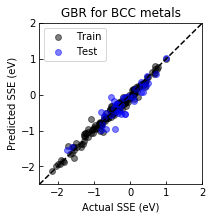

In [98]:
lineStart = test_y.min() 
lineEnd = prediction.max()  

plt.figure(figsize=(3,3))
plt.scatter(train_y, prediction1,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train')
plt.scatter(test_y,prediction,
          c = 'blue', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test')


plt.title('GBR for BCC metals')
plt.tight_layout()
axes = plt.gca()
axes.set_xlim([-2.5,2])
axes.set_ylim([-2.5,2])

diag_line, = axes.plot(axes.get_xlim(), axes.get_ylim(), ls="--", c="black")
axes.tick_params(axis="y",direction="in")
axes.tick_params(axis="x",direction="in")

plt.xlabel('Actual SSE (eV)')
plt.ylabel('Predicted SSE (eV)')
plt.legend(loc='upper left')

plt.savefig('GBR for BCC metals.png', dpi=2000)

from PIL import Image, ImageEnhance 
im = Image.open("GBR for BCC metals.png")
enhancer = ImageEnhance.Sharpness(im)
enhanced_im = enhancer.enhance(20000.0)
enhanced_im.save("GBR for BCC metals enhanced.png")

[3.57768082e-02 1.28792943e-02 2.00584808e-02 1.89445478e-05
 1.83228001e-01 2.43999417e-02 1.90900424e-02 3.57000972e-02
 1.02322979e-01 2.16047277e-04 1.66703036e-02 4.74007603e-02
 1.20893431e-02 2.16497851e-03 6.25136087e-02 4.49894825e-02
 1.38430251e-01 1.50570939e-01 9.02890284e-02 1.19066840e-03]


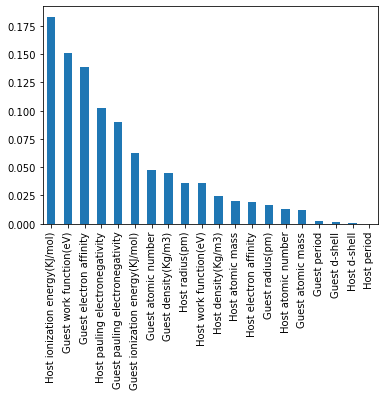

In [87]:
import pandas as pd
import numpy as np


print(est.feature_importances_) #use inbuilt class feature_importances of tree based regressors
#plot graph of feature importances for better visualization
feat_importances = pd.Series(est.feature_importances_, index=train_x.columns)
feat_importances.nlargest(22).plot(kind='bar')
plt.show()

[3.57768082e-02 1.28792943e-02 2.00584808e-02 1.89445478e-05
 1.83228001e-01 2.43999417e-02 1.90900424e-02 3.57000972e-02
 1.02322979e-01 2.16047277e-04 1.66703036e-02 4.74007603e-02
 1.20893431e-02 2.16497851e-03 6.25136087e-02 4.49894825e-02
 1.38430251e-01 1.50570939e-01 9.02890284e-02 1.19066840e-03]


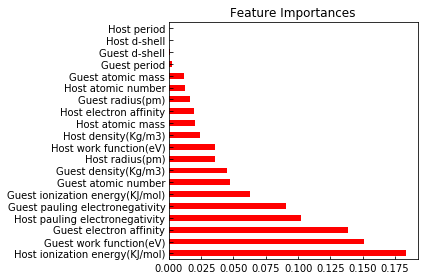

C:\Users\Damilola Ologunagba\Anaconda3\lib\site-packages\PIL\Image.py:2735: DecompressionBombWarning: Image size (96000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


In [99]:
import pandas as pd
import numpy as np
import seaborn as sns

print(est.feature_importances_)
feat_importances = pd.Series(est.feature_importances_, index=train_x.columns)
feat_importances.nlargest(22).plot(kind='barh', color ="red", align="center", alpha = 1)


axes = plt.gca()
axes.tick_params(axis="y",direction="in")
axes.tick_params(axis="x",direction="in")
plt.title("Feature Importances")
plt.tight_layout()
plt.savefig('BCC metals feature importance.png', dpi=2000)
plt.show()

from PIL import Image, ImageEnhance 
im = Image.open("BCC metals feature importance.png")
enhancer = ImageEnhance.Sharpness(im)
enhanced_im = enhancer.enhance(20000.0)
enhanced_im.save("BCC metals feature importance enhanced.png")